In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
df = pd.read_excel("ENB2012_data.xlsx")

In [5]:
X = df.iloc[:, 0:8]

In [6]:
y = df.iloc[:, 8]

In [7]:
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [8]:
print(X.shape)

(768, 8)


In [9]:
print(y.shape)

(768,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression,Lasso

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
lasso_reg = Lasso(alpha = 0.1)

In [19]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [20]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [22]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

print("Lasso Coefficients:", lasso_reg.coef_)

Linear Regression R2: 0.9122493571073745
Lasso Regression R2: 0.9032061783960788
Linear Regression MSE: 9.14646092472829
Lasso Regression MSE: 10.089053229372842
Lasso Coefficients: [-0.00000000e+00  1.83380566e-03  5.00025165e-02 -0.00000000e+00
  4.81856523e+00 -0.00000000e+00  1.45800845e+01  2.74362953e-01]


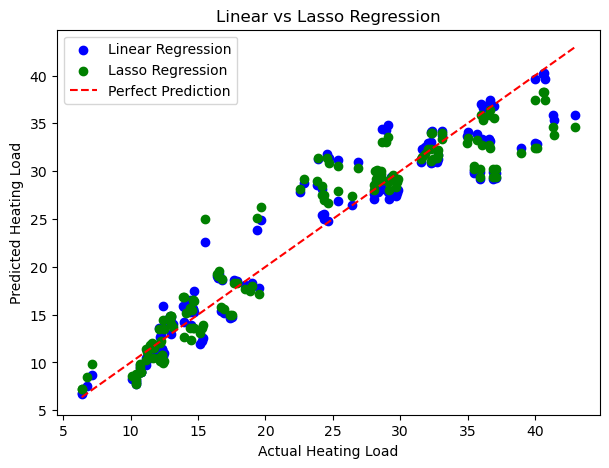

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lin, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_lasso, color="green", label="Lasso Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Perfect Prediction")
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Linear vs Lasso Regression")
plt.legend()
plt.show()